<a href="https://colab.research.google.com/github/AmrHassanKhalaf/AmrHassanKhalaf/blob/main/Sec_11/RNN/RNN_Test_93_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = tfds.load('imdb_reviews', as_supervised=True)
train_ds, test_ds = dataset['train'], dataset['test']

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.C1GU8X_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.C1GU8X_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.C1GU8X_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [ ]:
BATCH_SIZE = 64
train_ds = train_ds.shuffle(10000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
VOCAB_SIZE = 20000
SEQ_LEN = 200

encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE,
    output_mode='int',
    output_sequence_length=SEQ_LEN
)

encoder.adapt(train_ds.map(lambda x, y: x))

In [ ]:
EMBED_DIM = 128
UNITS = 128

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), dtype=tf.string),
    encoder,
    tf.keras.layers.Embedding(input_dim=VOCAB_SIZE,
                              output_dim=EMBED_DIM,
                              mask_zero=True),


    tf.keras.layers.SimpleRNN(UNITS, activation='tanh'),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 200)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 200, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,601,217 (9.92 MB)

 Trainable params: 2,601,217 (9.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=test_ds
)


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 95s 235ms/step - accuracy: 0.5069 - loss: 0.7086 - val_accuracy: 0.5036 - val_loss: 0.7008
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 88s 226ms/step - accuracy: 0.5106 - loss: 0.7013 - val_accuracy: 0.5553 - val_loss: 0.6814
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 89s 228ms/step - accuracy: 0.5724 - loss: 0.6706 - val_accuracy: 0.5715 - val_loss: 0.6613
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 92s 235ms/step - accuracy: 0.6505 - loss: 0.6130 - val_accuracy: 0.6088 - val_loss: 0.6609
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 92s 236ms/step - accuracy: 0.7337 - loss: 0.5309 - val_accuracy: 0.7332 - val_loss: 0.5526
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 140s 231ms/step - accuracy: 0.8179 - loss: 0.4269 - val_accuracy: 0.7054 - val_loss: 0.5910
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 90s 229ms/step - accuracy: 0.8526 - loss: 0.3568 - val_accuracy: 0.7456 - val_loss: 0.5708
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 91s 231ms/step - accuracy: 0.8801 - loss: 

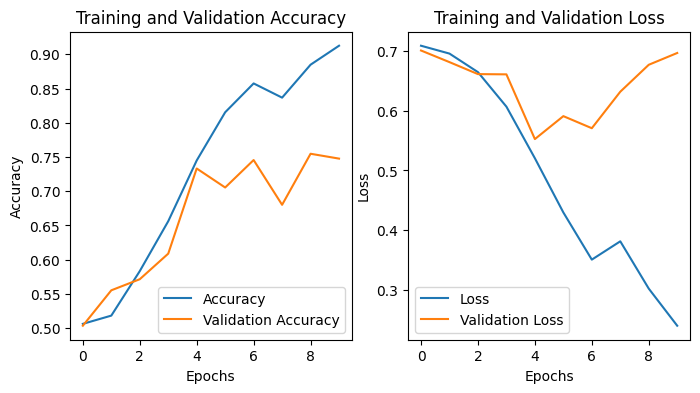

In [ ]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Loss', 'Validation Loss'])

plt.show()

In [ ]:
sample_text = (
    '''The movie by GeeksforGeeks was so good and the animation are so dope.
    I would recommend my friends to watch it.'''
)
sample_text_tensor = tf.constant([sample_text], dtype=tf.string)

predictions = model.predict(sample_text_tensor)

print("Prediction probability:", predictions[0])

if predictions[0] > 0.5:
    print('The review is positive')
else:
    print('The review is negative')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Prediction probability: [0.9394698]
The review is positive
